#  Predict the optimum number of clusters and represent it virtually.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [64]:
df = pd.read_csv("Iris.csv")

In [65]:
df.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


Building the KMeans objects

In [66]:
km  = KMeans(n_clusters =3)
km

KMeans(n_clusters=3)

In [67]:
y_predicted = km.fit_predict(df[['SepalLengthCm','PetalLengthCm']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [68]:
df["Scaled_cluster"] = y_predicted

In [78]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Scaled_cluster
0,1,0.222222,3.5,0.067797,0.2,Iris-setosa,0
1,2,0.166667,3.0,0.067797,0.2,Iris-setosa,0
2,3,0.111111,3.2,0.050847,0.2,Iris-setosa,0
3,4,0.083333,3.1,0.084746,0.2,Iris-setosa,0
4,5,0.194444,3.6,0.067797,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,0.666667,3.0,0.711864,2.3,Iris-virginica,2
146,147,0.555556,2.5,0.677966,1.9,Iris-virginica,1
147,148,0.611111,3.0,0.711864,2.0,Iris-virginica,2
148,149,0.527778,3.4,0.745763,2.3,Iris-virginica,2


 MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler()

In [72]:
scaler.fit(df[['SepalLengthCm']])

df["SepalLengthCm"] = scaler.transform(df[["SepalLengthCm"]])

scaler.fit(df[["PetalLengthCm"]])
df["PetalLengthCm"] = scaler.transform(df[["PetalLengthCm"]])

In [73]:
cl = km.cluster_centers_

In [74]:
cl

array([[5.00784314, 1.49411765],
       [5.87413793, 4.39310345],
       [6.83902439, 5.67804878]])

Representing the clusters in the plot

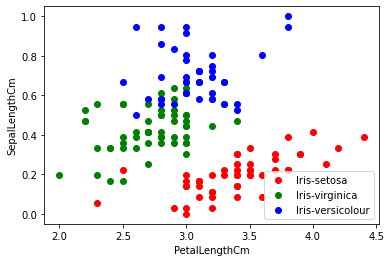

In [80]:
df1= df[df.Scaled_cluster==0]
df2= df[df.Scaled_cluster==1]
df3= df[df.Scaled_cluster==2]
plt.scatter(df1.SepalWidthCm,df1["SepalLengthCm"], color ="r",  label = "Iris-setosa")
plt.scatter(df2.SepalWidthCm,df2["SepalLengthCm"], color ="g", label = "Iris-virginica")
plt.scatter(df3.SepalWidthCm,df3["SepalLengthCm"], color ="b", label = "Iris-versicolour")
#plt.scatter(cl[:,0],cl[:,2], color = "purple", marker = '*')

plt.xlabel('PetalLengthCm')
plt.ylabel('SepalLengthCm')
plt.legend()

Using loop getting all the possible values of K for which the value of sum of squared value is minimum.

In [83]:
k_rng = range(1,11)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[["SepalLengthCm","PetalLengthCm"]])
    sse.append(km.inertia_)
    
print("The values of k are:")
sse

C:\Users\Santosh Paul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The values of k are:


[21.208947485940715,
 5.32522146051818,
 2.7327096687127543,
 1.8073805099441653,
 1.3835905940457895,
 1.0929350950807626,
 0.9139592669562547,
 0.7558675821347589,
 0.6449565728485355,
 0.5535771003683414]

### Plotting the Elbow for getting the best value of K

Text(0.5, 1.0, 'The elbow plot')

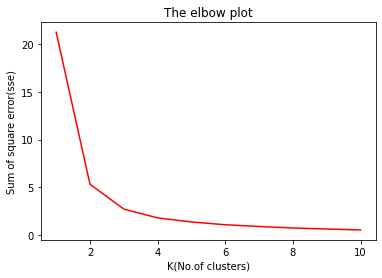

In [87]:
plt.xlabel("K(No.of clusters)")
plt.ylabel("Sum of square error(sse)")
plt.plot(k_rng,sse, color="r")
plt.title("The elbow plot")

**I conclude that the optimum value of k for clusturing the iris flowers is 3 for the category setosa, Virginica & virsicolor.**